In [0]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import pandas
from pyspark.sql.functions import col
data_BASE_DIR = "dbfs:/mnt/mids-w261/"
display(dbutils.fs.ls(f"{data_BASE_DIR}"))
# Airline Data    
df_flights = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_airlines_data_1y/")
# Weather data
df_weather1 = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_weather_data_1y/")
# Stations data      
df_stations = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/stations_data/stations_with_neighbors.parquet/")
# OTPW
df_otpw = spark.read.format("csv").option("header","true").load(f"dbfs:/mnt/mids-w261/OTPW_12M/OTPW_12M/")

path name size modificationTime dbfs:/mnt/mids-w261/HW5/ HW5/ 0 1753471807373 dbfs:/mnt/mids-w261/OTPW_12M/ OTPW_12M/ 0 1753471807373 dbfs:/mnt/mids-w261/OTPW_1D_CSV/ OTPW_1D_CSV/ 0 1753471807373 dbfs:/mnt/mids-w261/OTPW_36M/ OTPW_36M/ 0 1753471807373 dbfs:/mnt/mids-w261/OTPW_3M/ OTPW_3M/ 0 1753471807373 dbfs:/mnt/mids-w261/OTPW_3M_2015.csv OTPW_3M_2015.csv 1500620247 1741625185000 dbfs:/mnt/mids-w261/OTPW_3M_2015_delta/ OTPW_3M_2015_delta/ 0 1753471807373 dbfs:/mnt/mids-w261/OTPW_60M/ OTPW_60M/ 0 1753471807373 dbfs:/mnt/mids-w261/OTPW_60M_Backup/ OTPW_60M_Backup/ 0 1753471807373 dbfs:/mnt/mids-w261/airport-codes_csv.csv airport-codes_csv.csv 6232459 1740508595000 dbfs:/mnt/mids-w261/datasets_final_project/ datasets_final_project/ 0 1753471807373 dbfs:/mnt/mids-w261/datasets_final_project_2022/ datasets_final_project_2022/ 0 1753471807373 dbfs:/mnt/mids-w261/final_project_winter_2025/ final_project_winter_2025/ 0 1753471807373 dbfs:/mnt/mids-w261/student-groups/ student-groups/ 0 1753471807373 dbfs:/mnt/mids-w261/students-groups/ students-groups/ 0 1753471807373

#Shyam Engineered Attributes

In [0]:
# Read in airport codes and timezones, drop columns to those two, filter out rows with no codes

df_airport_timezones = (spark.read
        .option("header", True)
        .option("inferSchema", True)
        .csv("dbfs:/FileStore/Group_4_3/Data/airports_codes_timezones_with_header.csv")
        .drop("airport_id", "name", "city", "country", "icao_code", "latitude", "longitude", "altitude", "dst", "tz_db_timezone", "type", "source") # drop everything but iata code and timezone
        .filter(F.col("iata_code") != "\\N") #filter out airports with no iata code
)

display(df_airport_timezones)

iata_code timezone GKA 10 MAG 10 HGU 10 LAE 10 POM 10 WWK 10 UAK -3 GOH -3 SFJ -3 THU -4 AEY 0 EGS 0 HFN 0 HZK 0 IFJ 0 KEF 0 PFJ 0 RKV 0 SIJ 0 VEY 0 YAM -5 YAY -3.5 YAZ -8 YBB -7 YBC -5 YBG -5 YBK -6 YBL -8 YBR -6 YCB -7 YCD -8 YCG -8 YCH -4 YCL -4 YCO -7 YCT -7 YCW -8 YCY -5 YZS -5 YDA -8 YDB -8 YDF -3.5 YDL -8 YDN -6 YDQ -7 YEG -7 YEK -6 YEN -6 YET -7 YEU -6 YEV -7 YFB -5 YFC -4 YFE -5 YFO -6 YFR -7 YFS -7 YGK -5 YGL -5 YGP -5 YGQ -5 YGR -5 YHB -6 YHD -6 YHI -7 YHK -7 YHM -5 YHU -5 YHY -7 YHZ -4 YIB -5 YIO -5 YJN -5 YJT -3.5 YKA -8 YKF -5 YKL -5 YKY -6 YKZ -5 YLD -5 YLJ -6 YLL -7 YLT -5 YLW -8 YMA -8 YMJ -6 YMM -7 YMO -5 YMW -5 YMX -5 YNA -5 YND -5 YNM -5 YOC -8 YOD -7 YOJ -7 YOW -5 YPA -6 YPE -7 YPG -6 YPL -5 YPN -5 YPQ -5 YPR -8 YPY -7 YQA -5 YQB -5 YQF -7 YQG -5 YQH -8 YQK -6 YQL -7 YQM -4 YQQ -8 YQR -6 YQT -5 YQU -7 YQV -6 YQW -6 YQX -3.5 YQY -4 YQZ -8 YRB -6 YRI -5 YRJ -5 YRM -7 YRT -6 YSB -5 YSC -5 YSJ -4 YSM -7 YSR -5 YSU -4 YSY -7 YTE -5 YTH -6 YTR -5 YTS -5 YTZ -5 YUB -7 YUL -5 YUT -6 YUX -5 YUY -5 YVC -6 YVG -7 YVM -5 YVO -5 YVP -5 YVQ -7 YVR -8 YVT -6 YVV -5 YWA -5 YWG -6 YWK -4 YWL -8 YWY -7 YXC -7 YXD -7 YXE -6 YXH -7 YXJ -7 YXL -6 YXP -5 YXR -5 YXS -8 YXT -8 YXU -5 YXX -8 YXY -8 YYB -5 YYC -7 YYD -8 YYE -8 YYF -8 YYG -4 YYH -7 YYJ -8 YYL -6 YYN -6 YYQ -6 YYR -4 YYT -3.5 YYU -5 YYW -5 YYY -5 YYZ -5 YZD -5 YZE -5 YZF -7 YZH -7 YZP -8 YZR -5 YZT -8 YZU -7 YZV -5 YZW -8 YZX -4 ZFA -8 ZFM -7 QLD 1 BUJ 1 BJA 1 ALG 1 DJG 1 VVZ 1 TMR 1 GJL 1 MZW 1 AAE 1 CZL 1 TEE 1 HRM 1 TID 1 TIN 1 CFK 1 TAF 1 TLM 1 ORN 1 BFW 1 MUW 1 AZR 1 BSK 1 ELG 1 GHA 1 HME 1 INZ 1 TGR 1 LOO 1 TMX 1 OGX 1 IAM 1 COO 1 OUA 0 BOY 0 ACC 0 TML 0 NYI 0 TKD 0 ABJ 0 BYK 0 DJO 0 HGO 0 MJC 0 SPY 0 ASK 0 ABV 1 AKR 1 BNI 1 CBQ 1 ENU 1 IBA 1 ILR 1 JOS 1 KAD 1 KAN 1 MIU 1 MDI 1 LOS 1 MXJ 1 PHC 1 SKO 1 YOL 1 ZAR 1 MFQ 1 NIM 1 THZ 1 AJY 1 ZND 1 MIR 1 TUN 1 GAF 1 GAE 1 DJE 1 EBM 1 SFA 1 TOE 1 LRL 0 LFW 0 ANR 1 BRU 1 CRL 1 KJK 1 LGG 1 OST 1 OBL 1 AOC 1 IES 1 REB 1 QXH 1 BBH 1 ZMG 1 CBU 1 SXF 1 DRS 1 ERF 1 FRA 1 FMO 1 HAM 1 THF 1 CGN 1 DUS 1 MUC 1 NUE 1 LEJ 1 SCN 1 STR 1 TXL 1 HAJ 1 BRE 1 QEF 1 HHN 1 MHG 1 EIB 1 SGE 1 XFW 1 KEL 1 LBC 1 ESS 1 BFE 1 MGL 1 PAD 1 DTM 1 AGB 1 OBF 1 RBM 1 FDH 1 SZW 1 BYU 1 URD 1 HOQ 1 ZQW 1 ZQL 1 BWE 1 KSF 1 BRV 1 EME 1 WVN 1 BMK 1 NRD 1 FLF 1 GWT 1 KDL 2 URE 2 EPU 2 TLL 2 TAY 2 ENF 2 KEV 2 HEM 2 HEL 2 HYV 2 KTQ 2 IVL 2 JOE 2 JYV 2 KAU 2 KEM 2 KAJ 2 KHJ 2 KOK 2 KAO 2 KTT 2 KUO 2 QLF 2 LPP 2 MHQ 2 MIK 2 OUL 2 POR 2 RVN 2 SVL 2 SOT 2 TMP 2 TKU 2 UTI 2 VAA 2 VRK 2 YLI 2 BFS 0 ENK 0 BHD 0 LDY 0 BHX 0 CVT 0 GLO 0 GBA 0 MAN 0 NQY 0 LYE 0 YEO 0 HAW 0 CWL 0 SWS 0 BRS 0 LPL 0 LTN 0 PLH 0 BOH 0 SOU 0 QLA 0 ACI 0 GCI 0 JER 0 ESH 0 BQH 0 LGW 0 LCY 0 FAB 0 BBS 0 LHR 0 SEN 0 LYX 0 MSE 0 CAX 0 BLK 0 HUY 0 BWF 0 LBA 0 WRT 0 CEG 0 IOM 0 NCL 0 MME 0 EMA 0 KOI 0 LSI 0 WIC 0 ABZ 0 INV 0 GLA 0 EDI 0 ILY 0 PIK 0 BEB 0 SCS 0 DND 0 SYY 0 TRE 0 ADX 0 LMO 0 CBG 0 NWI 0 STN 0 EXT 0 FZO 0 OXF 0 BEX 0 LKZ 0 MHZ 0 QUY 0 FFD 0 BZZ 0 ODH 0 NHT 0 QCY 0 BEQ 0 SQZ 0 HRT 0 WTN 0 KNF 0 MPN -3 AMS 1 MST 1 EIN 1 GRQ 1 GLZ 1 DHR 1 LEY 1 LWR 1 RTM 1 UTC 1 ENS 1 LID 1 WOE 1 ORK 0 GWY 0 DUB 0 NOC 0 KIR 0 SNN 0 SXL 0 WAT 0 AAR 1 BLL 1 CPH 1 EBJ 1 KRP 1 BYR 1 MRW 1 ODE 1 RKE 1 RNN 1 SGD 1 SKS 1 SQW 1 TED 1 FAE 0 STA 1 AAL 1 LUX 1 AES 1 ANX 1 ALF 1 BNN 1 BOO 1 BGO 1 BJF 1 KRS 1 DLD 1 BDU 1 EVE 1 VDB 1 FRO 1 OSL 1 HAU 1 HAA 1 KSU 1 KKN 1 FAN 1 MOL 1 MJF 1 LKL 1 NTB 1 OLA 1 RRS 1 RYG 1 LYR 1 SKE 1 SRP 1 SSJ 1 TOS 1 TRF 1 TRD 1 SVG 1 GDN 1 KRK 1 KTW 1 POZ 1 RZE 1 SZZ 1 OSP 1 WAW 1 WRO 1 IEG 1 RNB 1 GOT 1 JKG 1 LDK 1 GSE 1 KVB 1 THN 1 KSK 1 MXX 1 NYO 1 KID 1 OSK 1 KLR 1 MMX 1 HAD 1 VXO 1 EVG 1 GEV 1 HUV 1 KRF 1 LYC 1 SDL 1 OER 1 KRN 1 SFT 1 UME 1 VHM 1 AJR 1 ORB 1 VST 1 LLA 1 ARN 1 BMA 1 BLE 1 HLF 1 GVX 1 LPI 1 NRK 1 EKT 1 VBY 1 SPM 1 RMS 1 GHF 1 ZCN 1 FRZ 1 ZNF 1 KZG 1 FCN 1 GKE 1 RLG 1 WBG 1 WIE 1 FEL 1 IGS 1 GUT 1 ALJ 2 AGZ 2 BIY 2 BFN 2 CPT 2 DUR 2 ELS 2 FCB 2 GCJ 2 GRJ 2 HRS 2 HDS 2 JNB 2 KXE 2 KIM 2 KMH 2 KLZ 2 HLA 2 SDB 2 LAY 2 MGH 2 LLE 2 MZQ 2 NCS 2 OVG 2 OUH 2 PLZ 2 PBZ 2 PHW 2

In [0]:
# Extensive feature engineering pipeline for flight turn metrics
#  - Computes time between previous arrival and scheduled departure
#  - Computes previous departure delay and previous arrival delay for the most recent preceding flight
#  - Enforces a minimum 2-hour turn threshold for joins


# ----------------------------------------------------------------------------
# STEP 1: Enrich original flights with local timezones for ORIGIN and DEST
# ----------------------------------------------------------------------------
# df_flights: base DataFrame of flights
# df_airport_timezones: mapping iata_code -> numeric timezone offset hours

df_enriched = (
    df_otpw.alias("fl")
      # ORIGIN timezone
      .join(
          df_airport_timezones
            .select(
              F.col("iata_code").alias("origin_iata"),
              F.col("timezone").alias("ORIGIN_TIMEZONE")
            ),
          on=F.col("fl.ORIGIN") == F.col("origin_iata"), how="left"
      ).drop("origin_iata")
      # DEST timezone
      .join(
          df_airport_timezones
            .select(
              F.col("iata_code").alias("dest_iata"),
              F.col("timezone").alias("DEST_TIMEZONE")
            ),
          on=F.col("fl.DEST") == F.col("dest_iata"), how="left"
      ).drop("dest_iata")
)

# ----------------------------------------------------------------------------
# STEP 2: Parse HHMM time fields to minutes since midnight
# ----------------------------------------------------------------------------
df_parsed = (
    df_enriched
      .withColumn("CRS_DEP_TIME_STR", F.lpad(F.col("CRS_DEP_TIME").cast("string"), 4, "0"))
      .withColumn("CRS_DEP_TIME_MINUTES",
          F.substring("CRS_DEP_TIME_STR", 1, 2).cast("int") * 60 +
          F.substring("CRS_DEP_TIME_STR", 3, 2).cast("int")
      )
      .withColumn("ARR_TIME_STR", F.lpad(F.col("ARR_TIME").cast("string"), 4, "0"))
      .withColumn("ARR_TIME_MINUTES",
          F.substring("ARR_TIME_STR", 1, 2).cast("int") * 60 +
          F.substring("ARR_TIME_STR", 3, 2).cast("int")
      )
      .withColumn("DEP_TIME_STR", F.lpad(F.col("DEP_TIME").cast("string"), 4, "0"))
      .withColumn("DEP_TIME_MINUTES",
          F.substring("DEP_TIME_STR", 1, 2).cast("int") * 60 +
          F.substring("DEP_TIME_STR", 3, 2).cast("int")
      )
)

# ----------------------------------------------------------------------------
# STEP 3: Build 'destination' DataFrame carrying previous delays & times
# ----------------------------------------------------------------------------
df_dest = df_parsed.select(
    F.col("TAIL_NUM").alias("dest_TAIL_NUM"),
    F.col("DEST").alias("dest_AIRPORT"),
    F.col("FL_DATE").alias("dest_FL_DATE"),
    F.col("ARR_DELAY").alias("PREV_ARR_DELAY"),
    F.col("ARR_TIME_MINUTES").alias("prev_ARR_TIME_MINUTES"),
    F.col("DEP_DELAY").alias("prev_DEP_DELAY"),
    F.col("DEP_TIME_MINUTES").alias("prev_DEP_TIME_MINUTES")
)

# ----------------------------------------------------------------------------
# STEP 4: Join to potential preceding flights by tail & origin
# ----------------------------------------------------------------------------
df_joined = df_parsed.alias("orig").join(
    df_dest,
    on=(
        (F.col("orig.TAIL_NUM") == F.col("dest_TAIL_NUM")) &
        (F.col("orig.ORIGIN") == F.col("dest_AIRPORT")) &
        (
            (F.col("orig.FL_DATE") == F.col("dest_FL_DATE")) |
            (F.col("orig.FL_DATE") == F.date_add(F.col("dest_FL_DATE"), 1))
        )
    ), how="left"
)

# ----------------------------------------------------------------------------
# STEP 5: Pre-compute adjusted arrival minutes for window tie-breaker
# ----------------------------------------------------------------------------
df_adjusted = (
    df_joined
      .withColumn("prev_day_flag",
          F.when(F.col("dest_FL_DATE") < F.col("FL_DATE"), 1).otherwise(0)
      )
      .withColumn("prev_ARR_TIME_MINUTES_ADJ",
          F.col("prev_ARR_TIME_MINUTES") - F.col("prev_day_flag") * 1440
      )
      .withColumn("prev_DEP_TIME_MINUTES_ADJ",
          F.col("prev_DEP_TIME_MINUTES") - F.col("prev_day_flag") * 1440
      )
)

# ----------------------------------------------------------------------------
# STEP 6: Window + rank → pick the most recent prior flight by date & time
# ----------------------------------------------------------------------------
window_spec = Window.partitionBy("orig.TAIL_NUM", "orig.ORIGIN", "orig.FL_DATE").orderBy(
    F.col("dest_FL_DATE").desc(),
    F.col("prev_ARR_TIME_MINUTES_ADJ").desc()
)
df_ranked = df_adjusted.withColumn("rn", F.row_number().over(window_spec))

# ----------------------------------------------------------------------------
# STEP 7: Compute gaps & enforce 2-hour threshold
# ----------------------------------------------------------------------------
df_full = (
    df_ranked.filter(F.col("rn")==1)
      .withColumn("TIME_BETWEEN_ARR_AND_SCHEDULED_DEP",
          F.col("CRS_DEP_TIME_MINUTES") - F.col("prev_ARR_TIME_MINUTES_ADJ")
      )
      .withColumn("TIME_SINCE_PREV_DEP",
          F.col("CRS_DEP_TIME_MINUTES") - F.col("prev_DEP_TIME_MINUTES_ADJ")
      )
      .withColumn(
          "TIME_BETWEEN_ARR_AND_SCHEDULED_DEP",
          F.when(F.col("TIME_BETWEEN_ARR_AND_SCHEDULED_DEP")>=120,
                 F.col("TIME_BETWEEN_ARR_AND_SCHEDULED_DEP")).otherwise(None)
      )
      .withColumn(
          "PREV_ARR_DELAY",
          F.when(F.col("TIME_BETWEEN_ARR_AND_SCHEDULED_DEP").isNotNull(),
                 F.col("PREV_ARR_DELAY")).otherwise(None)
      )
      .withColumn(
          "PREV_DEP_DELAY",
          F.when(F.col("TIME_SINCE_PREV_DEP")>=120,
                 F.col("prev_DEP_DELAY")).otherwise(None)
      )
      .drop(
          "rn","dest_TAIL_NUM","dest_AIRPORT","dest_FL_DATE",
          "CRS_DEP_TIME_STR","CRS_DEP_TIME_MINUTES",
          "ARR_TIME_STR","ARR_TIME_MINUTES",
          "DEP_TIME_STR","DEP_TIME_MINUTES",
          "prev_ARR_TIME_MINUTES","prev_DEP_TIME_MINUTES",
          "prev_day_flag","prev_ARR_TIME_MINUTES_ADJ","prev_DEP_TIME_MINUTES_ADJ",
          "TIME_SINCE_PREV_DEP","ORIGIN_TIMEZONE","DEST_TIMEZONE"
      )
)

# ----------------------------------------------------------------------------
# STEP 8: Final select: original + engineered features in order
# ----------------------------------------------------------------------------
original_cols = df_otpw.columns

df_final = df_full.select(
    *original_cols,
    "TIME_BETWEEN_ARR_AND_SCHEDULED_DEP",
    "PREV_DEP_DELAY",
    "PREV_ARR_DELAY"
)

# Display result
display(df_final)

QUARTER DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_FIPS ORIGIN_STATE_NM ORIGIN_WAC DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME TOTAL_ADD_GTIME LONGEST_ADD_GTIME YEAR MONTH origin_airport_name origin_station_name origin_station_id origin_iata_code origin_icao origin_type origin_region origin_station_lat origin_station_lon origin_airport_lat origin_airport_lon origin_station_dis dest_airport_name dest_station_name dest_station_id dest_iata_code dest_icao dest_type dest_region dest_station_lat dest_station_lon dest_airport_lat dest_airport_lon dest_station_dis sched_depart_date_time sched_depart_date_time_UTC four_hours_prior_depart_UTC two_hours_prior_depart_UTC STATION DATE LATITUDE LONGITUDE ELEVATION NAME REPORT_TYPE SOURCE HourlyAltimeterSetting HourlyDewPointTemperature HourlyDryBulbTemperature HourlyPrecipitation HourlyPresentWeatherType HourlyPressureChange HourlyPressureTendency HourlyRelativeHumidity HourlySkyConditions HourlySeaLevelPressure HourlyStationPressure HourlyVisibility HourlyWetBulbTemperature HourlyWindDirection HourlyWindGustSpeed HourlyWindSpeed Sunrise Sunset DailyAverageDewPointTemperature DailyAverageDryBulbTemperature DailyAverageRelativeHumidity DailyAverageSeaLevelPressure DailyAverageStationPressure DailyAverageWetBulbTemperature DailyAverageWindSpeed DailyCoolingDegreeDays DailyDepartureFromNormalAverageTemperature DailyHeatingDegreeDays DailyMaximumDryBulbTemperature DailyMinimumDryBulbTemperature DailyPeakWindDirection DailyPeakWindSpeed DailyPrecipitation DailySnowDepth DailySnowfall DailySustainedWindDirection DailySustainedWindSpeed DailyWeather MonthlyAverageRH MonthlyDaysWithGT001Precip MonthlyDaysWithGT010Precip MonthlyDaysWithGT32Temp MonthlyDaysWithGT90Temp MonthlyDaysWithLT0Temp MonthlyDaysWithLT32Temp MonthlyDepartureFromNormalAverageTemperature MonthlyDepartureFromNormalCoolingDegreeDays MonthlyDepartureFromNormalHeatingDegreeDays MonthlyDepartureFromNormalMaximumTemperature MonthlyDepartureFromNormalMinimumTemperature MonthlyDepartureFromNormalPrecipitation MonthlyDewpointTemperature MonthlyGreatestPrecip MonthlyGreatestPrecipDate MonthlyGreatestSnowDepth MonthlyGreatestSnowDepthDate MonthlyGreatestSnowfall MonthlyGreatestSnowfallDate MonthlyMaxSeaLevelPressureValue MonthlyMaxSeaLevelPressureValueDate MonthlyMaxSeaLevelPressureValueTime MonthlyMaximumTemperature MonthlyMeanTemperature MonthlyMinSeaLevelPressureValue MonthlyMinSeaLevelPressureValueDate MonthlyMinSeaLevelPressureValueTime MonthlyMinimumTemperature MonthlySeaLevelPressure MonthlyStationPressure MonthlyTotalLiquidPrecipitation MonthlyTotalSnowfall MonthlyWetBulb AWND CDSD CLDD DSNW HDSD HTDD NormalsCoolingDegreeDay NormalsHeatingDegreeDay ShortDurationEndDate005 ShortDurationEndDate010 ShortDurationEndDate015 ShortDurationEndDate020 ShortDurationEndDate030 ShortDurationEndDate045 ShortDurationEndDate060 ShortDurationEndDate080 ShortDurationEndDate100 ShortDurationEndDate120 ShortDurationEndDate150 ShortDurationEndDate180 ShortDurationPrecipitationValue005 ShortDurationPrecipitationValue010 ShortDurationPrecipitationValue015 ShortDurationPrecipitationValue020 ShortDurationPrecipitationValue030 ShortDurationPrecipitationValue045 ShortDurationPrecipitationValue060 ShortDurationPrecipitationValue080 ShortDurationPrecipitationValue100 ShortDurationPrecipitat

❌ Removed StandardScaler (not needed for tree models)

✅ Kept clean interaction features

✅ Tuned regularization: reg_alpha=0.5, reg_lambda=3.0

✅ Capped target delay at 180 minutes, minimum at 1

✅ Evaluates MAE on both log and raw (actual delay) scales

# added attributes based on XGBoost 7.25 feature importance

In [0]:
from pyspark.sql.functions import col, when, to_date, log, exp
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from xgboost.spark import SparkXGBRegressor

# === STEP 1: High-impact numeric features ===
high_signal_numeric = [
    "CRS_ELAPSED_TIME", "DISTANCE", "MONTH",
    "TIME_BETWEEN_ARR_AND_SCHEDULED_DEP",
    "PREV_DEP_DELAY", "PREV_ARR_DELAY",
    "ELEVATION", "HourlyPrecipitation"
]

# === STEP 2: Feature engineering ===
df_final = df_final.withColumn("DELAY_TREND", col("PREV_ARR_DELAY") - col("PREV_DEP_DELAY"))
high_signal_numeric += ["DELAY_TREND"]

# === STEP 3: Cast numeric features and target ===
for col_name in high_signal_numeric + ["DEP_DELAY"]:
    df_final = df_final.withColumn(col_name, col(col_name).cast("float"))

# === STEP 4: Target transformation (log + cap) ===
df_final = df_final.withColumn("target_delay_log", when(col("DEP_DELAY") > 180, 180).otherwise(col("DEP_DELAY")))
df_final = df_final.withColumn("target_delay_log", when(col("target_delay_log") < 1, 1).otherwise(col("target_delay_log")))
df_final = df_final.withColumn("target_delay_log", log(col("target_delay_log")))

# === STEP 5: Final columns and NA removal ===
df_final = df_final.withColumn("FL_DATE", to_date("FL_DATE"))
df_clean = df_final.select(high_signal_numeric + ["target_delay_log", "DEP_DELAY", "OP_UNIQUE_CARRIER", "FL_DATE"]).dropna()

# === STEP 6: Categorical encoding ===
indexer = StringIndexer(inputCol="OP_UNIQUE_CARRIER", outputCol="carrier_index", handleInvalid="keep")
encoder = OneHotEncoder(inputCol="carrier_index", outputCol="carrier_ohe")

# === STEP 7: Assemble features ===
assembler = VectorAssembler(inputCols=high_signal_numeric + ["carrier_ohe"], outputCol="features")

# === STEP 8: XGBoost regressor ===
xgb = SparkXGBRegressor(
    features_col="features",
    label_col="target_delay_log",
    prediction_col="prediction",
    objective="reg:squarederror",
    num_round=200,
    max_depth=8,
    eta=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    missing=0.0
)

# === STEP 9: Pipeline ===
pipeline = Pipeline(stages=[indexer, encoder, assembler, xgb])

# === STEP 10: Time-series cross-validation ===
unique_dates = [row["FL_DATE"] for row in df_clean.select("FL_DATE").distinct().sort("FL_DATE").collect()]
folds = 5
window_size = len(unique_dates) // (folds + 1)
metrics = []

for i in range(folds):
    train_end = unique_dates[(i + 1) * window_size]
    test_start = train_end
    test_end = unique_dates[(i + 2) * window_size] if (i + 2) * window_size < len(unique_dates) else unique_dates[-1]

    train_data = df_clean.filter(col("FL_DATE") < train_end)
    test_data = df_clean.filter((col("FL_DATE") >= test_start) & (col("FL_DATE") < test_end))

    model = pipeline.fit(train_data)
    predictions = model.transform(test_data)

    # === Reverse log for raw MAE ===
    predictions = predictions.withColumn("predicted_delay", exp(col("prediction")))

    # === Evaluation ===
    eval_r2       = RegressionEvaluator(labelCol="target_delay_log", predictionCol="prediction", metricName="r2")
    eval_rmse     = RegressionEvaluator(labelCol="target_delay_log", predictionCol="prediction", metricName="rmse")
    eval_log_mae  = RegressionEvaluator(labelCol="target_delay_log", predictionCol="prediction", metricName="mae")
    eval_raw_mae  = RegressionEvaluator(labelCol="DEP_DELAY", predictionCol="predicted_delay", metricName="mae")

    r2 = eval_r2.evaluate(predictions)
    rmse = eval_rmse.evaluate(predictions)
    log_mae = eval_log_mae.evaluate(predictions)
    raw_mae = eval_raw_mae.evaluate(predictions)

    print(f"\nFold {i+1} — R²: {r2:.4f}, RMSE: {rmse:.4f}, Log MAE: {log_mae:.4f}, Raw MAE: {raw_mae:.2f}")
    metrics.append((r2, rmse, log_mae, raw_mae))

# === STEP 11: Average metrics ===
avg_r2       = sum(m[0] for m in metrics) / folds
avg_rmse     = sum(m[1] for m in metrics) / folds
avg_log_mae  = sum(m[2] for m in metrics) / folds
avg_raw_mae  = sum(m[3] for m in metrics) / folds

print("\n🚀 Average Cross-Validated Results:")
print(f"R²:         {avg_r2:.4f}")
print(f"RMSE (log): {avg_rmse:.4f}")
print(f"MAE  (log): {avg_log_mae:.4f}")
print(f"MAE  (min): {avg_raw_mae:.2f}")


2025-07-25 23:13:45,260 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.8, 'device': 'cpu', 'max_depth': 8, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8, 'num_round': 200, 'eta': 0.05, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 23:16:00,512 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 1 — R²: -0.0361, RMSE: 1.2478, Log MAE: 1.0081, Raw MAE: 12.18


2025-07-25 23:31:20,933 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.8, 'device': 'cpu', 'max_depth': 8, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8, 'num_round': 200, 'eta': 0.05, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 23:34:24,036 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 2 — R²: 0.1037, RMSE: 1.2335, Log MAE: 0.8330, Raw MAE: 12.62


2025-07-25 23:49:26,350 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.8, 'device': 'cpu', 'max_depth': 8, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8, 'num_round': 200, 'eta': 0.05, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-25 23:51:48,430 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 3 — R²: 0.1162, RMSE: 1.2187, Log MAE: 0.9031, Raw MAE: 12.15


2025-07-26 00:03:08,070 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.8, 'device': 'cpu', 'max_depth': 8, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8, 'num_round': 200, 'eta': 0.05, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-26 00:05:59,344 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 4 — R²: 0.0199, RMSE: 1.0610, Log MAE: 0.7777, Raw MAE: 9.84


2025-07-26 00:19:54,912 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.8, 'device': 'cpu', 'max_depth': 8, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8, 'num_round': 200, 'eta': 0.05, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-26 00:23:44,221 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 5 — R²: 0.0666, RMSE: 1.1640, Log MAE: 0.7578, Raw MAE: 11.31

🚀 Average Cross-Validated Results:
R²:         0.0541
RMSE (log): 1.1850
MAE  (log): 0.8560
MAE  (min): 11.62


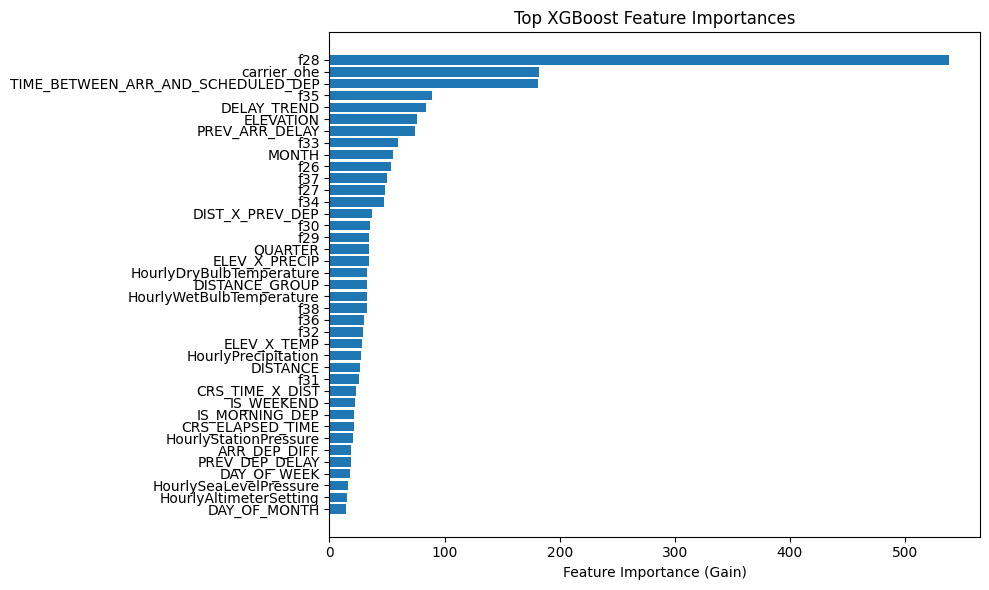

In [0]:
import matplotlib.pyplot as plt

# STEP 1: Get booster from trained model
booster = model.stages[-1].get_booster()
importance_dict = booster.get_score(importance_type="gain")

# STEP 2: Try to get input feature names
# Handle OneHotEncoder case: fallback to assembler input cols (not perfect but informative)
try:
    input_features = model.stages[2].getInputCols()  # Assembler is stage 2 in your pipeline
except:
    input_features = [f"f{i}" for i in range(len(importance_dict))]

# STEP 3: Map XGBoost f# format to actual names if index is valid
feature_importance = []
for f, score in importance_dict.items():
    if f.startswith("f"):
        idx = int(f[1:])
        if idx < len(input_features):
            feature_importance.append((input_features[idx], score))
        else:
            feature_importance.append((f, score))  # fallback if index out of bounds

# STEP 4: Sort and plot
feature_importance.sort(key=lambda x: x[1], reverse=True)
top_n = 50
top_features = feature_importance[:top_n]
names, scores = zip(*top_features)

plt.figure(figsize=(10, 6))
plt.barh(range(len(scores)), scores[::-1])
plt.yticks(range(len(scores)), [name for name in names[::-1]])
plt.xlabel("Feature Importance (Gain)")
plt.title("Top XGBoost Feature Importances")
plt.tight_layout()
plt.show()


In [0]:
from pyspark.sql.functions import col, when, to_date
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from xgboost.spark import SparkXGBRegressor

# === STEP 1: Feature Engineering ===
selected_features = [
    "CRS_ELAPSED_TIME", "DISTANCE", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK",  
    "TIME_BETWEEN_ARR_AND_SCHEDULED_DEP", "PREV_DEP_DELAY", "PREV_ARR_DELAY",
    "ELEVATION", "HourlyPrecipitation"
]

df_final = df_final.withColumn("DELAY_TREND", col("PREV_ARR_DELAY") - col("PREV_DEP_DELAY"))
df_final = df_final.withColumn("CRS_DEP_HOUR", (col("CRS_DEP_TIME") / 100).cast("int"))
df_final = df_final.withColumn("IS_WEEKEND", when(col("DAY_OF_WEEK").isin([6, 7]), 1).otherwise(0))
df_final = df_final.withColumn("IS_MORNING_DEP", when((col("CRS_DEP_HOUR") >= 6) & (col("CRS_DEP_HOUR") < 12), 1).otherwise(0))
df_final = df_final.withColumn("HIGH_PREV_DEP_DELAY", when(col("PREV_DEP_DELAY") > 30, 1).otherwise(0))
df_final = df_final.withColumn("HIGH_PREV_ARR_DELAY", when(col("PREV_ARR_DELAY") > 30, 1).otherwise(0))
df_final = df_final.withColumn("target_delay", when(col("DEP_DELAY") > 180, 180).otherwise(col("DEP_DELAY")))

selected_features += ["DELAY_TREND", "CRS_DEP_HOUR", "IS_WEEKEND", "IS_MORNING_DEP", "HIGH_PREV_DEP_DELAY", "HIGH_PREV_ARR_DELAY"]

# Cast numerics
for col_name in selected_features + ["target_delay"]:
    df_final = df_final.withColumn(col_name, col(col_name).cast("float"))

df_final = df_final.withColumn("FL_DATE", to_date("FL_DATE"))
df_clean = df_final.select(selected_features + ["target_delay", "DEP_DELAY", "OP_UNIQUE_CARRIER", "FL_DATE"]).dropna()

# === STEP 2: Pipeline ===
indexer = StringIndexer(inputCol="OP_UNIQUE_CARRIER", outputCol="carrier_index", handleInvalid="keep")
encoder = OneHotEncoder(inputCol="carrier_index", outputCol="carrier_ohe")
assembler = VectorAssembler(inputCols=selected_features + ["carrier_ohe"], outputCol="features")

xgb = SparkXGBRegressor(
    features_col="features",
    label_col="target_delay",
    prediction_col="prediction",
    objective="reg:squarederror",
    num_round=500,
    max_depth=6,
    eta=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.3,
    reg_lambda=1.0,
    missing=0.0
)

pipeline = Pipeline(stages=[indexer, encoder, assembler, xgb])

# === STEP 3: Time-based CV ===
unique_dates = [row["FL_DATE"] for row in df_clean.select("FL_DATE").distinct().sort("FL_DATE").collect()]
folds = 5
window_size = len(unique_dates) // (folds + 1)
metrics = []

for i in range(folds):
    train_end = unique_dates[(i + 1) * window_size]
    test_start = unique_dates[(i + 1) * window_size]
    test_end = unique_dates[(i + 2) * window_size] if (i + 2) * window_size < len(unique_dates) else unique_dates[-1]

    train_data = df_clean.filter(col("FL_DATE") < train_end)
    test_data = df_clean.filter((col("FL_DATE") >= test_start) & (col("FL_DATE") < test_end))

    model = pipeline.fit(train_data)
    predictions = model.transform(test_data)

    eval_r2 = RegressionEvaluator(labelCol="target_delay", predictionCol="prediction", metricName="r2")
    eval_rmse = RegressionEvaluator(labelCol="target_delay", predictionCol="prediction", metricName="rmse")
    eval_mae = RegressionEvaluator(labelCol="target_delay", predictionCol="prediction", metricName="mae")

    r2 = eval_r2.evaluate(predictions)
    rmse = eval_rmse.evaluate(predictions)
    mae = eval_mae.evaluate(predictions)

    print(f"\nFold {i+1} — R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.2f}")
    metrics.append((r2, rmse, mae))

# === STEP 4: Average Metrics ===
avg_r2 = sum(m[0] for m in metrics) / folds
avg_rmse = sum(m[1] for m in metrics) / folds
avg_mae = sum(m[2] for m in metrics) / folds

print("\n🚀 Average Cross-Validated Results:")
print(f"R²:   {avg_r2:.4f}")
print(f"RMSE: {avg_rmse:.4f}")
print(f"MAE:  {avg_mae:.2f}")


2025-07-26 02:10:36,436 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.9, 'device': 'cpu', 'max_depth': 6, 'reg_alpha': 0.3, 'reg_lambda': 1.0, 'subsample': 0.9, 'num_round': 500, 'eta': 0.1, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-26 02:12:59,704 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 1 — R²: 0.0420, RMSE: 23.7070, MAE: 12.60


2025-07-26 02:33:37,144 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.9, 'device': 'cpu', 'max_depth': 6, 'reg_alpha': 0.3, 'reg_lambda': 1.0, 'subsample': 0.9, 'num_round': 500, 'eta': 0.1, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-26 02:40:38,977 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 2 — R²: 0.0999, RMSE: 25.1044, MAE: 11.32


2025-07-26 03:07:19,822 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.9, 'device': 'cpu', 'max_depth': 6, 'reg_alpha': 0.3, 'reg_lambda': 1.0, 'subsample': 0.9, 'num_round': 500, 'eta': 0.1, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-26 03:14:22,534 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 3 — R²: 0.1049, RMSE: 24.0795, MAE: 12.26


2025-07-26 03:40:34,910 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.9, 'device': 'cpu', 'max_depth': 6, 'reg_alpha': 0.3, 'reg_lambda': 1.0, 'subsample': 0.9, 'num_round': 500, 'eta': 0.1, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-26 03:48:38,074 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 4 — R²: 0.0109, RMSE: 19.9339, MAE: 10.22


2025-07-26 04:16:33,464 INFO XGBoost-PySpark: _fit Running xgboost-2.0.3 on 1 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.9, 'device': 'cpu', 'max_depth': 6, 'reg_alpha': 0.3, 'reg_lambda': 1.0, 'subsample': 0.9, 'num_round': 500, 'eta': 0.1, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
2025-07-26 04:26:36,954 INFO XGBoost-PySpark: _fit Finished xgboost training!



Fold 5 — R²: 0.0655, RMSE: 23.3830, MAE: 9.96

🚀 Average Cross-Validated Results:
R²:   0.0646
RMSE: 23.2416
MAE:  11.27
